# A method to categorical variable in flight delay datasets
Thanks to https://www.datacamp.com/community/tutorials/categorical-data#categorical

In [0]:
import pandas as pd
import numpy as np
import copy
%matplotlib inline

In [2]:
df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')

df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [6]:
print(df_flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
year         162049 non-null int64
month        162049 non-null int64
day          162049 non-null int64
dep_time     161192 non-null float64
dep_delay    161192 non-null float64
arr_time     161061 non-null float64
arr_delay    160748 non-null float64
carrier      162049 non-null object
tailnum      161801 non-null object
flight       162049 non-null int64
origin       162049 non-null object
dest         162049 non-null object
air_time     160748 non-null float64
distance     162049 non-null int64
hour         161192 non-null float64
minute       161192 non-null float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB
None


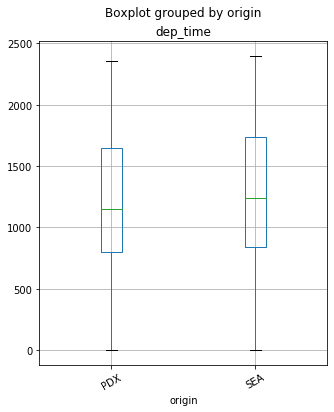

In [7]:
df_flights.boxplot('dep_time','origin',rot = 30,figsize=(5,6))

In [0]:
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()

In [9]:
cat_df_flights.head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


In [10]:
print(cat_df_flights.isnull().values.sum())

248


In [11]:
print(cat_df_flights.isnull().sum())

carrier      0
tailnum    248
origin       0
dest         0
dtype: int64


In [0]:
cat_df_flights = cat_df_flights.fillna(cat_df_flights['tailnum'].value_counts().index[0])

In [13]:
print(cat_df_flights.isnull().values.sum())

0


In [14]:
print(cat_df_flights['carrier'].value_counts())

AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64


In [15]:
print(cat_df_flights['carrier'].value_counts().count())

11


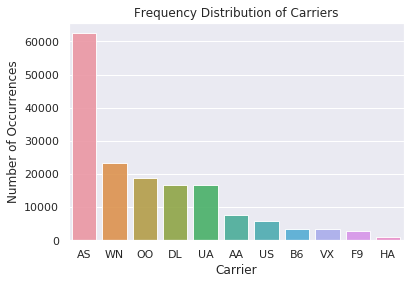

In [16]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = cat_df_flights['carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

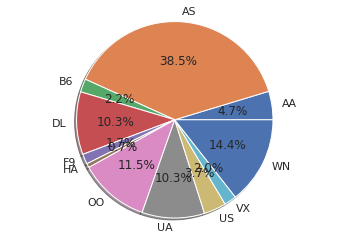

In [17]:
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
counts = cat_df_flights['carrier'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

# Encoding Categorical Data

You will now learn different techniques to encode the categorical features to numeric quantities. To keep it simple, you will apply these encoding methods only on the carrier column. However, the same approach can be extended to all columns.
The techniques that you'll cover are the following:
- Replacing values
- Encoding labels
- One-Hot encoding
- Binary encoding
- Backward difference encoding
- Miscellaneous features

### Replace Values

Let's start with the most basic method, which is just replacing the categories with the desired numbers. This can be achieved with the help of the replace() function in pandas. The idea is that you have the liberty to choose whatever numbers you want to assign to the categories according to the business use case.

In [0]:
replace_map = {'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4,
                                  'F9': 5, 'HA': 6, 'OO': 7 , 'UA': 8 , 'US': 9,'VX': 10,'WN': 11}}

In [19]:
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
replace_map_comp = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'F9': 5, 'HA': 6, 'OO': 7, 'UA': 8, 'US': 9, 'VX': 10, 'WN': 11}}


In [0]:
cat_df_flights_replace = cat_df_flights.copy()

In [22]:
cat_df_flights_replace.replace(replace_map_comp, inplace=True)

print(cat_df_flights_replace.head())

   carrier tailnum origin dest
0        2  N508AS    PDX  ANC
1        9  N195UW    SEA  CLT
2        8  N37422    PDX  IAH
3        9  N547UW    PDX  CLT
4        2  N762AS    SEA  ANC


In [24]:
print(cat_df_flights_replace['carrier'].dtypes)

int64


In [25]:
cat_df_flights_lc = cat_df_flights.copy()
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category')                                                              

print(cat_df_flights_lc.dtypes)

carrier    category
tailnum      object
origin     category
dest         object
dtype: object


In [26]:
import time
%timeit cat_df_flights.groupby(['origin','carrier']).count() #DataFrame with object dtype columns

10 loops, best of 3: 35 ms per loop


In [27]:
%timeit cat_df_flights_lc.groupby(['origin','carrier']).count() #DataFrame with category dtype columns

10 loops, best of 3: 22.9 ms per loop


## Label Encoding

Another approach is to encode categorical values with a technique called "label encoding", which allows you to convert each value in a column to a number. Numerical labels are always between 0 and n_categories-1.

In [0]:
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].cat.codes

In [29]:
cat_df_flights_lc.head() #alphabetically labeled from 0 to 10

,carrier,tailnum,origin,dest
0,1,N508AS,PDX,ANC
1,8,N195UW,SEA,CLT
2,7,N37422,PDX,IAH
3,8,N547UW,PDX,CLT
4,1,N762AS,SEA,ANC


In [30]:
cat_df_flights_specific = cat_df_flights.copy()
cat_df_flights_specific['US_code'] = np.where(cat_df_flights_specific['carrier'].str.contains('US'), 1, 0)

cat_df_flights_specific.head()

,carrier,tailnum,origin,dest,US_code
0,AS,N508AS,PDX,ANC,0
1,US,N195UW,SEA,CLT,1
2,UA,N37422,PDX,IAH,0
3,US,N547UW,PDX,CLT,1
4,AS,N762AS,SEA,ANC,0


In [31]:
cat_df_flights_sklearn = cat_df_flights.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_df_flights_sklearn['carrier_code'] = lb_make.fit_transform(cat_df_flights['carrier'])

cat_df_flights_sklearn.head() #Results in appending a new column to df

,carrier,tailnum,origin,dest,carrier_code
0,AS,N508AS,PDX,ANC,1
1,US,N195UW,SEA,CLT,8
2,UA,N37422,PDX,IAH,7
3,US,N547UW,PDX,CLT,8
4,AS,N762AS,SEA,ANC,1


### One-Hot encoding

The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly.
There are many libraries out there that support one-hot encoding but the simplest one is using pandas' .get_dummies() method.

In [32]:
cat_df_flights_onehot = cat_df_flights.copy()
cat_df_flights_onehot = pd.get_dummies(cat_df_flights_onehot, columns=['carrier'], prefix = ['carrier'])

print(cat_df_flights_onehot.head())

  tailnum origin dest  ...  carrier_US  carrier_VX  carrier_WN
0  N508AS    PDX  ANC  ...           0           0           0
1  N195UW    SEA  CLT  ...           1           0           0
2  N37422    PDX  IAH  ...           0           0           0
3  N547UW    PDX  CLT  ...           1           0           0
4  N762AS    SEA  ANC  ...           0           0           0

[5 rows x 14 columns]


In [33]:
cat_df_flights_onehot_sklearn = cat_df_flights.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_df_flights_onehot_sklearn['carrier'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_results_df.head())

   AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0   0   1   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   0   0   1   0   0
2   0   0   0   0   0   0   0   1   0   0   0
3   0   0   0   0   0   0   0   0   1   0   0
4   0   1   0   0   0   0   0   0   0   0   0


In [34]:
result_df = pd.concat([cat_df_flights_onehot_sklearn, lb_results_df], axis=1)

print(result_df.head())

  carrier tailnum origin dest  AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0      AS  N508AS    PDX  ANC   0   1   0   0   0   0   0   0   0   0   0
1      US  N195UW    SEA  CLT   0   0   0   0   0   0   0   0   1   0   0
2      UA  N37422    PDX  IAH   0   0   0   0   0   0   0   1   0   0   0
3      US  N547UW    PDX  CLT   0   0   0   0   0   0   0   0   1   0   0
4      AS  N762AS    SEA  ANC   0   1   0   0   0   0   0   0   0   0   0


### Binary Encoding

This technique is not as intuitive as the previous ones. In this technique, first the categories are encoded as ordinal, then those integers are converted into binary code, then the digits from that binary string are split into separate columns. This encodes the data in fewer dimensions than one-hot.

In [36]:
!pip install category_encoders
cat_df_flights_ce = cat_df_flights.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['carrier'])
df_binary = encoder.fit_transform(cat_df_flights_ce)

df_binary.head()

     |████████████████████████████████| 102kB 3.8MB/s 


,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,tailnum,origin,dest
0,0,0,0,0,1,N508AS,PDX,ANC
1,0,0,0,1,0,N195UW,SEA,CLT
2,0,0,0,1,1,N37422,PDX,IAH
3,0,0,0,1,0,N547UW,PDX,CLT
4,0,0,0,0,1,N762AS,SEA,ANC


# Backward Difference Encoding

This technique falls under the contrast coding system for categorical features. A feature of K categories, or levels, usually enters a regression as a sequence of K-1 dummy variables. In backward difference coding, the mean of the dependent variable for a level is compared with the mean of the dependent variable for the prior level. This type of coding may be useful for a nominal or an ordinal variable. <br>
http://www.statsmodels.org/dev/contrasts.html

In [37]:
encoder = ce.BackwardDifferenceEncoder(cols=['carrier'])
df_bd = encoder.fit_transform(cat_df_flights_ce)

df_bd.head()

,intercept,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,carrier_5,carrier_6,carrier_7,carrier_8,carrier_9,tailnum,origin,dest
0,1,-0.909091,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N508AS,PDX,ANC
1,1,0.090909,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N195UW,SEA,CLT
2,1,0.090909,0.181818,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N37422,PDX,IAH
3,1,0.090909,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N547UW,PDX,CLT
4,1,-0.909091,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N762AS,SEA,ANC


### Miscellaneous Features

Sometimes you may encounter categorical feature columns which specify the ranges of values for observation points, for example, the age column might be described in the form of categories like 0-20, 20-40 and so on.

In [38]:
dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})
dummy_df_age['start'], dummy_df_age['end'] = zip(*dummy_df_age['age'].map(lambda x: x.split('-')))

dummy_df_age.head()

,age,start,end
0,0-20,0,20
1,20-40,20,40
2,40-60,40,60
3,60-80,60,80


In [39]:
dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})

def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

dummy_df_age['age_mean'] = dummy_df_age['age'].apply(lambda x: split_mean(x))

dummy_df_age.head()

,age,age_mean
0,0-20,10.0
1,20-40,30.0
2,40-60,50.0
3,60-80,70.0


## Dealing with Categorical Features in Big Data with Spark

In [41]:
!pip install pyspark
from pyspark import SparkContext
sc = SparkContext()

     |████████████████████████████████| 217.8MB 63kB/s 
     |████████████████████████████████| 204kB 45.8MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=83579e7252327b8d9377bb60ca1ed88f42a8e1cf2b74355c98289a5a818aefcd
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [0]:
# from pyspark.sql import SparkSession as spark

In [0]:
# print(spark.catalog.listTables())

In [0]:
# spark_flights = spark.read.format("csv").option('header',True).load('Downloads/datasets/nyc_flights/flights.csv',inferSchema=True)

In [0]:
# spark_flights.show(3)

In [0]:
# spark_flights.printSchema()

In [0]:
# spark_flights.createOrReplaceTempView("flights_temp")

In [0]:
# carrier_df = spark_flights.select("carrier")
# carrier_df.show(5)

In [0]:
# from pyspark.ml.feature import StringIndexer
# carr_indexer = StringIndexer(inputCol="carrier",outputCol="carrier_index")
# carr_indexed = carr_indexer.fit(carrier_df).transform(carrier_df)

# carr_indexed.show(7)

In [0]:
# carrier_df_onehot = spark_flights.select("carrier")

# from pyspark.ml.feature import OneHotEncoder, StringIndexer

# stringIndexer = StringIndexer(inputCol="carrier", outputCol="carrier_index")
# model = stringIndexer.fit(carrier_df_onehot)
# indexed = model.transform(carrier_df_onehot)
# encoder = OneHotEncoder(dropLast=False, inputCol="carrier_index", outputCol="carrier_vec")
# encoded = encoder.transform(indexed)

# encoded.show(7)